# Data repository for Network Analysis of Energy Futures
## Article Title: Visualizing different perspectives in energy scenarios
## Authors: Jude H. Kurniawan (University of Waterloo), Vanessa Schweizer (University of Waterloo)

Repository: https://github.com/judekurn/energy-futures/blob/master/Energyfutures.ipynb

### Abstract:
Studies of energy futures have been garnering attention because they could provide the bird’s eye view of the landscape and the roadmaps toward low-carbon energy transitions (Geels et al., 2016; Rogelj et al. 2016). However, different organizations often conduct and commission energy futures studies independently and may unknowingly influence scenario outcomes to be aligned with the organizations’ perspectives—hence, stories told by different scenarios can be quite different. Insofar, research has rarely examined ways to ‘harmonize’ different scenarios, let alone ‘stitching’ them all together for producing a wider perspective of energy futures (Zurek and Henrich, 2006; Schweizer and Kurniawan, 2016). Here we apply social network analysis to visualize different perspectives of four Canadian energy futures studies and one word energy scenarios developed by different organizations. We find that certain studies have narrow perspective and appear to align with either the pro-economics or pro-environmentalism perspectives. To harmonize these different perspectives, we analyze by visualizing all scenario elements and their interrelationship derived from individual studies. We observe relational patterns underneath the complex surface for how different energy futures studies interrelate. We found that low-carbon energy transition at the global scale is highly dependent on the establishment of low-carbon governance and institutions. Interestingly, at the country-level such as Canada, low-carbon governance is not the fundamental driver; instead, Canada should be more concerned with issues related to mass consumption and freight/logistic transport. Our study suggests that understanding the country-specific fundamental driver of low-carbon energy transition will avoid ‘barking at the wrong trees.’

In [1]:
import csv
import networkx as nx
import pandas as pd
import community
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn import color_palette, set_style, palplot

In [2]:
import pkg_resources
print('Networkx Version: ',pkg_resources.get_distribution('networkx').version)
print('Pandas Version: ',pkg_resources.get_distribution('pandas').version)
print('Matplotlib Version: ',pkg_resources.get_distribution('matplotlib').version)

Networkx Version:  2.1
Pandas Version:  0.22.0
Matplotlib Version:  2.2.0


### Description of Edgelist.csv file
We subjected the five energy futures studies to qualitatative analysis (a.k.a. qualitative coding technique) to search and extract text stings or statements implying scenario elements influencing others in the future. These statements suggest interrelationships between two scenario elements. We put emphasis on the future, which means the statements decribing influences in the past would be ignored; statements indicating influences in the future would be incorporated into the dataset (Edgelist.csv). The dataset comprises a list of two scenario elements deemed to have an established relationship. In this study, the edges are non-directed influences because statements describing the interrelationship might not be explicit in indicating causations, instead they implied correlations.

In [3]:
se = pd.read_csv('./data/ES_edgelist.csv', sep=',')
se.head()

,node1,node2,report_name
0,Oil consumption,GHG Emissions (aggregate),Trottier
1,LNG consumption,GHG Emissions (aggregate),Trottier
2,Electricity consumption,GHG Emissions (aggregate),Trottier
3,Biofuels consumption,Oil consumption,Trottier
4,Oil consumption,GHG Emissions (aggregate),Trottier


I load the compiled edgelist in .csv file into a pandas dataframe. The data has three columns, node1, node2, and report_name

In [4]:
#Seperating edgelist into different dataframes so that nodes/edges attributes can be manipulated individually
se4 = se.iloc[:192]
se_trot = se.iloc[:30]
se_deep = se.iloc[30:72]
se_neb = se.iloc[72:92]
se_rnrg = se.iloc[92:192]
se_wec = se.iloc[192:]

Subsequently, I create dataframe se4 for 4 energy futures studies related to Canada...excluding the global study conducted by WEC, and individual edgelist for each scenarios report. The reason for this is because I would like to produce invididual graphs for each report.

## Section 1: Network analysis to reveal relational pattern of energy futures studies for Canada
The graphs GSE (Graphs Scenarios Energy) are created using Networkx that imports edgelist from the pandas dataframes. Note that GSE5 is the graph that consists of 5 scenario reports (4 Canada and 1 World scenarios) and the GSE4 is a grpah for 4 Canada scenario reports. The GSE5 will become the overall 'layout' in this study while the *smaller* graphs (e.g. GSE4 and GSE_example) will be layered over the overall layout.

In [5]:
GSE5 = nx.from_pandas_edgelist(se,'node1','node2',edge_attr=True)
GSE4 = nx.from_pandas_edgelist(se4,'node1','node2',edge_attr=True)
GSE_trot = nx.from_pandas_edgelist(se_trot,'node1','node2',edge_attr=True)
GSE_deep = nx.from_pandas_edgelist(se_deep,'node1','node2',edge_attr=True)
GSE_neb = nx.from_pandas_edgelist(se_neb,'node1','node2',edge_attr=True)
GSE_rnrg = nx.from_pandas_edgelist(se_rnrg,'node1','node2',edge_attr=True)
GSE_wec = nx.from_pandas_edgelist(se_wec,'node1','node2',edge_attr=True)

In [6]:
nx.info(GSE5)

'Name: \nType: Graph\nNumber of nodes: 179\nNumber of edges: 246\nAverage degree:   2.7486'

The figure shown below comprises of 4 sub-plots arranged in 2x2. I use the kamadi_kawai layout to obtain a fixed seed (the nodes location will not change when the figure is regenerated). The layout is based on GSE5 (5 scenarios) but I only plot the GSE4 (4 scenarios) because I want to show the perspective of one scenario against the Canada scenarios (that means 4 scenarios). The nodes/edges from individual report are plotted in blue against the backdrop of all nodes/edges for four Canada energy scenarios plotted in grey.

<Figure size 432x288 with 0 Axes>

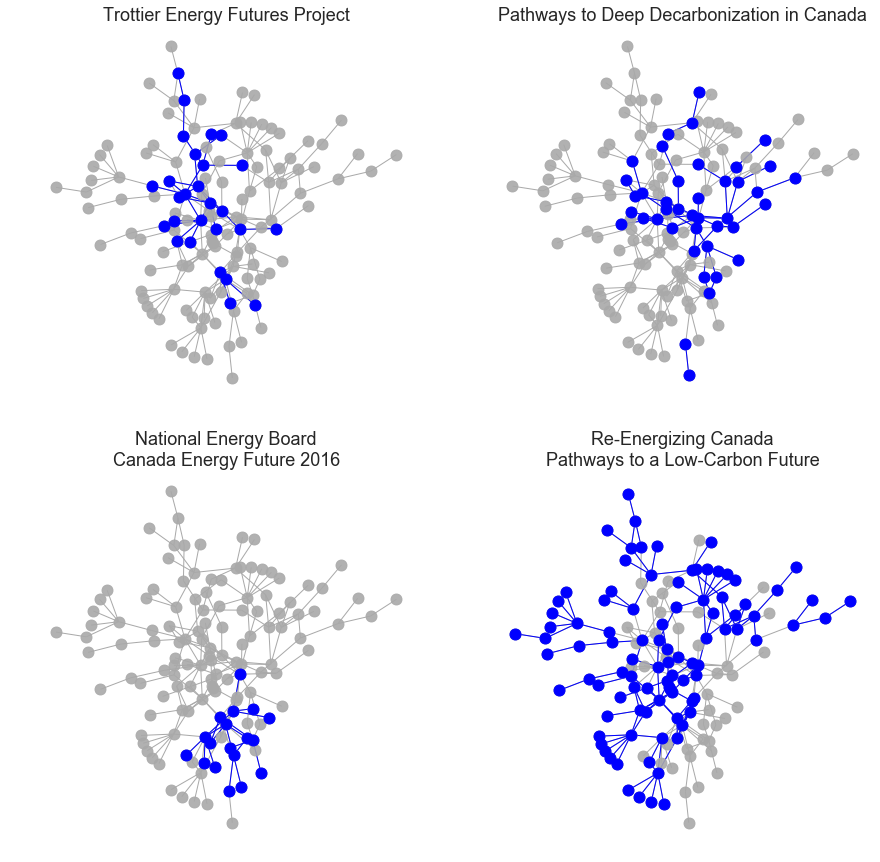

<Figure size 432x288 with 0 Axes>

In [7]:
#customization lines for different studies
studytext1 = 'Trottier Energy Futures Project'
studytext2 = 'Re-Energizing Canada\nPathways to a Low-Carbon Future'
studytext3 = 'National Energy Board\nCanada Energy Future 2016'
studytext4 = 'Pathways to Deep Decarbonization in Canada'
# Customization ends

plt.figure(0)

#layout = nx.spring_layout(GSE5, random_state=22) # GSE5 is the base layout for all the graph plots
layout = nx.kamada_kawai_layout(GSE5)
set_style('white')
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.axis('off')
plt.title(studytext1,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.9)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1)
nx.draw_networkx_nodes(GSE_trot, layout, node_color='b', node_size=120)
nx.draw_networkx_edges(GSE_trot, layout, edge_color='b',width=1)

plt.subplot(224)
plt.axis('off')
plt.title(studytext2,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.9)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1)
nx.draw_networkx_nodes(GSE_rnrg, layout, node_color='b', node_size=120)
nx.draw_networkx_edges(GSE_rnrg, layout, edge_color='b',width=1)

plt.subplot(223)
plt.axis('off')
plt.title(studytext3,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.9)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1)
nx.draw_networkx_nodes(GSE_neb, layout, node_color='b', node_size=120)
nx.draw_networkx_edges(GSE_neb, layout, edge_color='b',width=1)

plt.subplot(222)
plt.axis('off')
plt.title(studytext4,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.9)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1)
nx.draw_networkx_nodes(GSE_deep, layout, node_color='b', node_size=120)
nx.draw_networkx_edges(GSE_deep, layout, edge_color='b',width=1)

plt.show()
plt.savefig('./figures/four_scenarios_comparison.pdf')

The Trottier report covers a portion of the central theme (we will know this theme when we perform community detections in the next section). NEB report has a narrow perspective as can be seen from the relational pattern shown. The Deep Decarbonization report has a wider perspective than trottier, which is not surprising because Trottier scenarios are based on quantiative energy modelling which may limit the use of scenario elements, especially qualitative scenario elements that cannot be coupled to the models. Interestingly, the Deep Decabonization report seems to be 'mutually exclusive' with the NEB report. Of the four scenarios, the Re-Energizing Canada report are shown to have the broadest perspective.

In [8]:
print('The scenario elements or nodes in NEB report are: \n', GSE_neb.nodes())
print('The scenario elements or nodes in Deep Decarbonizations report are: \n', list(GSE_deep.nodes()))

The scenario elements or nodes in NEB report are: 
 ['Oil demand (global)', 'Oil prices (global)', 'LNG production (USA)', 'Oil sand production', 'LNG demand (USA/Canada)', 'LNG prices (global)', 'Population', 'GDP', 'USA Economy', 'Rise of China and Asia', 'Export', 'LNG infrastructures development', 'LNG production', 'Energy intensity', 'Developing countries GDP', 'Oil infrastructures development', 'LNG demand (USA)', 'LNG demand']
The scenario elements or nodes in Deep Decarbonizations report are: 
 ['Fuel switching', 'GHG Emissions (aggregate)', 'Renewable energy generation', 'Wind power production cost', 'Wind power generation', 'Solar power production cost', 'Solar power generation', 'Innovation capacity (global)', 'Banning coal/oil-fired generation', 'Carbon intensity', 'Gas-fired generation', 'LNG demand', 'New clean tech generation', 'Electricity generation', 'Electrification policy', 'Tech dev in renewable energy', 'GHG Emissions (building)', 'Adoption of EV', 'GHG Emissions 

From the list of nodes found in NEB and Deep Decarbonization reports, we observe that NEB report emphasizes issues related to economic development (energy demand and supply) of the resource extraction sector. There seems to be no nodes addressing environmental issue metnioned by the report. The Deep Decarbonization report, on the other hand, comprises of nodes related to the production of clean energy and addresses mostly environmental issues. Although the environmental issues are addressed extensively, the report appears to have missed the economic issues -- resource economic. Incorporating scenario elements related to resource economy is particular important for Canada since we cannot simply 'flick' the switch from carbon economy to decarbonized economy. We need to analyse how we can make the transition.

## Section 2: Network analysis to reveal relational pattern across scale (Canada/Global)
It will be interesting to observe how nergy futures in Canada correspond to global energy futures. Here, I use global energy scenario by World Energy Council (WEC) to find out how enery futures studies in Canada would stack up against the world energy scenarios.

### Extracting cross-scale nodes
There are nodes present in WEC studies that may be also present in one of the four Canadian energy studies. To capture these cross-scale nodes, I created a list of nodes derived from the set intersection between the nodes found in GSE4 and GSE_wec. From the list of nodes, I created a graph, GSE_xscale, which will be used lated to plot the graph.

In [11]:
ls1 = list(GSE4.nodes())
ls2 = list(GSE_wec.nodes())
ls3 = set(ls1).intersection(ls2)
GSE_xscale = nx.Graph()
for n in ls3:
    GSE_xscale.add_node(n)
#Note: I can also use the list of nodes and pass it to the networkx_draw functions in order to
#manipulate individual nodes attributes for visualization

I created another figure, this time it is comprised of three sub-plots arranged in 1x3. 

<Figure size 432x288 with 0 Axes>

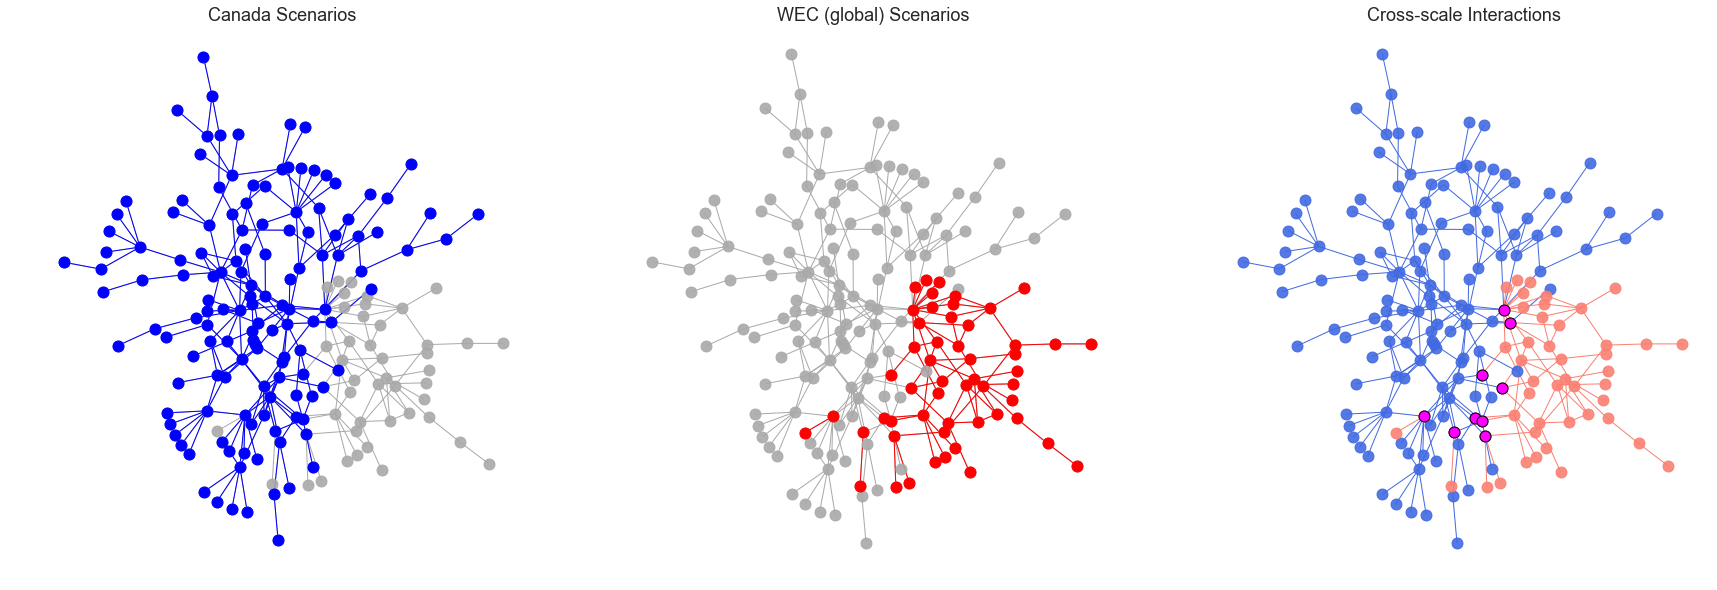

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(1)

layout = nx.kamada_kawai_layout(GSE5)
set_style('white')
plt.figure(figsize=(30,10))
plt.axis('off')

plt.subplot(131)
plt.axis('off')
plt.title('Canada Scenarios',fontsize=18)
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgrey', node_size=120, alpha = .9)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgrey',width=1)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=120)
nx.draw_networkx_edges(GSE4, layout, edge_color='b',width=1)

plt.subplot(132)
plt.axis('off')
plt.title('WEC (global) Scenarios',fontsize=18)
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgrey', node_size=120, alpha=.9)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgrey',width=1)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='r', node_size=120)
nx.draw_networkx_edges(GSE_wec, layout, edge_color='r',width=1)

plt.subplot(133)
plt.axis('off')
plt.title('Cross-scale Interactions',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='royalblue', node_size=120, alpha = .9)
nx.draw_networkx_edges(GSE4, layout, edge_color='royalblue',width=1)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='salmon', node_size=120, alpha = .9)
nx.draw_networkx_edges(GSE_wec, layout, edge_color='salmon',width=1)
nx.draw_networkx_nodes(GSE_xscale, layout, node_color='magenta', edgecolors='k',node_size=120)

plt.show()
plt.savefig('./figures/world_canada_comparison.pdf')

The graph image shows the extent of scenario perspective between 4 Canada scenarios and WEC scenarios. The green dots are the nodes that are present in Canada scenario reports as well as in the global WEC report. That means the green dots are the cross-scale interactions between local and global scenarios for this case.

In [13]:
GSE_xscale.node()

NodeView(('Rise of China and Asia', 'LNG prices (global)', 'LNG demand (global)', 'Developing countries GDP', 'GDP', 'Oil prices (global)', 'Innovation capacity (global)', 'Oil demand (global)', 'GHG reduction target'))

Closer examination of the cross-scale nodes, it appears that Canada energy futures are closely related to three global factors, which are the the global development (developing countries GDP, rise of China and Asia), global energy demand (LNG and oil demand, LNG and oil prices, GHG reduction target), and global innovation capacity.

Being the exporter of fossil fuel resources, the driving factor for export of resources might be motivated by the growth in the developing countries that generates global demand for oil and gas. However, the global energy market could have a major influence on which and what energy resources would be extracted and eventually expoerted. This may explain the seggegration between oil and gas.

Another aspect is the cross-scale linkage for innovative capactiy. The relationship is not clear if the global innovative capacity would be having effects on the local energy futures or the other way. Although it also prudent to speculate that the increase in innovative capacity at the global level could influence how well Canada could transition to the low-carbon energy futures.

## Section 3: Ranking nodes' degree of influence
In this section, I will use two indices (Betweenness centrality and Eigenvector centrality) to visualize the degree of influence a node has on the entire network. But first, I extracted the 'giant' network components. That means this is the max (or biggest) sub-network ignoring the smaller networks that comprise of 2-4 nodes

In [15]:
giant4 = max(nx.connected_component_subgraphs(GSE4), key=len)
print(nx.density(giant4))
print(nx.diameter(giant4))
print(nx.average_shortest_path_length(giant4))

0.021021726365237817
11
5.094891368173811


### Eigenvector and Betweenness centrality
The Eigenvector centrality : definitions and descriptions ...
The Betweenness centrality : definitions and descriptions ...

In [16]:
partition = community.best_partition(giant4)
modularity = community.modularity(partition, giant4)
print('Modularity:', modularity)

Modularity: 0.692347305015449


In [17]:
#deg = nx.degree_centrality(giant4)
eig = nx.eigenvector_centrality(giant4)
bet = nx.betweenness_centrality(giant4)
#clo = nx.closeness_centrality(giant4)
#pgr = nx.pagerank(giant4)

# I use only eigenvector and betweenness only for this study and markdown the other three indices

#Change to "code" if you wanna see the full centralities
cent_df = pd.DataFrame.from_dict([deg, eig, bet, clo, pgr, partition])
cent_df = pd.DataFrame.transpose(cent_df)cent_df.columns = ['degree', 'eigenvector',
                                                            'betweenness', 'closeness', 'pagerank', 'community']
cent_df.to_csv('./data/centralities.csv')

The calculated centrality indices are placed in a container dataframe called cent_df comprising of eig, bet and community. The community is to show how nodes from diff communities stack up

In [19]:
cent_df = pd.DataFrame.from_dict([eig, bet, partition])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Eigenvector', 'Betweenness', 'Community']
cent_df['Community'] = cent_df['Community'].astype(int)
cent_df.to_csv('./data/centralities.csv')

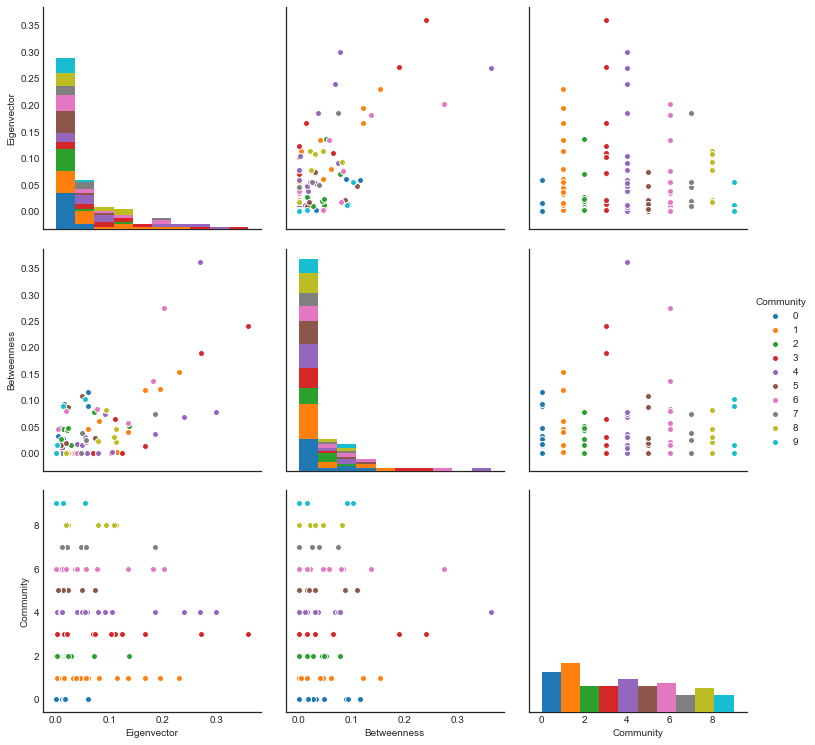

In [55]:
sns.pairplot(cent_df, hue = 'Community', size=3.5)
plt.savefig('./figures/centrality_scatterplot_matrix.pdf')

The community / eigenvector or betweenness scatterplots show that the nodes belong to the community group are quite evenly distributed. That means no group comprise only high betweenness or eigenvector. When eyeballing the eig/bet scatterplot, group 4 seems to be overrepresented by nodes with high eigenvector centrality scores.

In [21]:
eig_sorted_df = cent_df.sort_values('Eigenvector',ascending=False)
bet_sorted_df = cent_df.sort_values('Betweenness',ascending=False)
#bet_sorted_df.min(['Eigenvector'])
#cent_df.max()

I calculate the normalize score of both centralities indices and use equal weightage to combine the two scores. Then I select the descriptors with the highest scores. I choose top 20 scores and excluded GHG Emission (aggregate) because this descriptor is too 'dilute' or it is a 'catch-all' descriptors that may not provide disaggregate information required for this study.

In [22]:
eig_norm = (cent_df['Eigenvector'] - min(cent_df['Eigenvector'])) / (max(cent_df['Eigenvector']) - min(cent_df['Eigenvector'])) * 0.5
bet_norm = (cent_df['Betweenness'] - min(cent_df['Betweenness'])) / (max(cent_df['Betweenness']) - min(cent_df['Betweenness'])) * 0.5
select_df = eig_norm + bet_norm
select_df = select_df.sort_values(ascending = False)
select_df.head(25)

GHG Emissions (aggregate)             0.874579
GHG Emissions (transport)             0.831598
Energy intensity                      0.659695
Trucking (heavy freight) load         0.640602
LNG production                        0.530922
Oil consumption                       0.525190
Tech dev in energy storage            0.439784
Export                                0.437012
Adoption of EV                        0.429314
GDP                                   0.398422
Oil sand production                   0.359684
Electricity consumption               0.307818
Tech dev in low carbon system         0.265887
Tech dev in green transport           0.259515
Biofuels production                   0.251445
Renewable energy generation           0.243579
Transition to decarbonized economy    0.243578
Biogas production                     0.242211
Labor force                           0.242023
Fuel switching                        0.230680
GHG Emissions (oil and gas)           0.220775
Agricultural 

### Plotting degree of influence
First, I create a list that contains all nodes of the selected descriptor (20 nodes) excluding GHG Emission (aggregate). This list will be used to super impose on the plot to 'highlight' the selected nodes in the network.

In [26]:
select21_ls = select_df.index.values[:21].tolist()
select21_ls.remove('GHG Emissions (aggregate)') #this descriptor is removed from the selection
select21_ls

['GHG Emissions (transport)',
 'Energy intensity',
 'Trucking (heavy freight) load',
 'LNG production',
 'Oil consumption',
 'Tech dev in energy storage',
 'Export',
 'Adoption of EV',
 'GDP',
 'Oil sand production',
 'Electricity consumption',
 'Tech dev in low carbon system',
 'Tech dev in green transport',
 'Biofuels production',
 'Renewable energy generation',
 'Transition to decarbonized economy',
 'Biogas production',
 'Labor force',
 'Fuel switching',
 'GHG Emissions (oil and gas)']

The above shows the list of **20 nodes selected** for CIB analysis

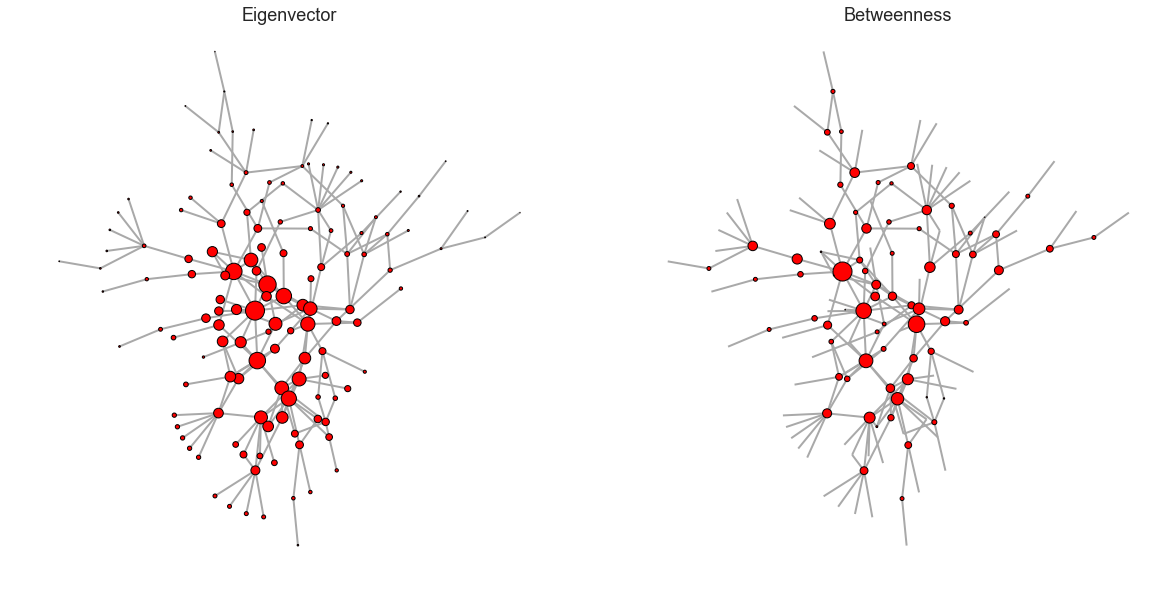

In [27]:
eig_size = [1000*eig[n] for n in giant4.nodes()]
bet_size = [1000*bet[n] for n in giant4.nodes()]

layout = nx.kamada_kawai_layout(GSE5)
plt.figure(figsize=(20,10))
plt.axis('off')

plt.subplot(121)
plt.axis('off')
plt.title('Eigenvector',fontsize=18)
nx.draw_networkx_nodes(giant4, layout, node_color='r', node_size=eig_size, edgecolors='k')
nx.draw_networkx_edges(giant4, layout, edge_color='darkgrey',width=2)

plt.subplot(122)
plt.axis('off')
plt.title('Betweenness',fontsize=18)
nx.draw_networkx_nodes(giant4, layout, node_color='r', node_size=bet_size, edgecolors='k')
nx.draw_networkx_edges(giant4, layout, edge_color='darkgrey',width=2)

plt.savefig('./figures/centrality_graphplot.pdf')

The figure above shows nodes with their sizes correspond to centrality scores

In [29]:
H = GSE4.subgraph(select21_ls)
for n in H.nodes():
    print (n,'is connected to', list(H.neighbors(n)))

Biofuels production is connected to ['Oil consumption', 'Tech dev in energy storage', 'Trucking (heavy freight) load']
Tech dev in energy storage is connected to ['GHG Emissions (oil and gas)', 'Oil consumption', 'Biofuels production', 'Energy intensity']
Fuel switching is connected to ['Energy intensity']
Renewable energy generation is connected to []
GDP is connected to ['LNG production', 'Export', 'Transition to decarbonized economy']
Tech dev in green transport is connected to ['GHG Emissions (transport)', 'Adoption of EV']
Tech dev in low carbon system is connected to ['Energy intensity', 'GHG Emissions (oil and gas)', 'Oil sand production', 'LNG production']
Adoption of EV is connected to ['Energy intensity', 'Oil consumption', 'Electricity consumption', 'GHG Emissions (transport)', 'Tech dev in green transport']
Electricity consumption is connected to ['Oil consumption', 'Adoption of EV']
Export is connected to ['Energy intensity', 'GDP', 'Oil sand production', 'LNG production',

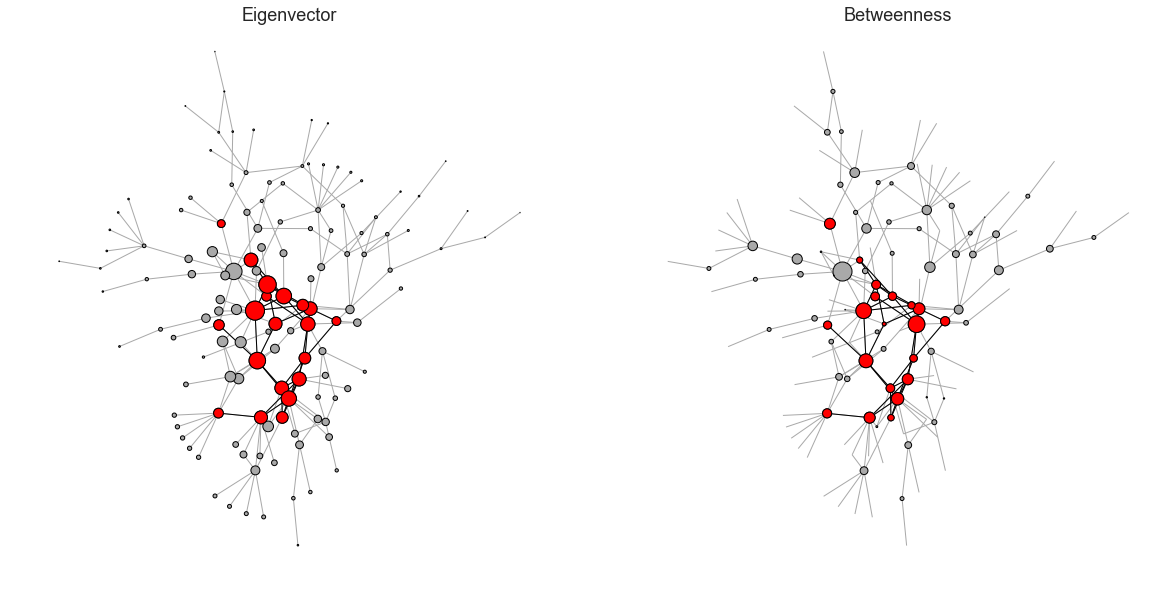

<Figure size 432x288 with 0 Axes>

In [30]:
eigh_size = [1000*eig[n] for n in H.nodes()]
beth_size = [1000*bet[n] for n in H.nodes()]

layout = nx.kamada_kawai_layout(GSE5)
plt.figure(figsize=(20,10))
plt.axis('off')

plt.subplot(121)
plt.axis('off')
plt.title('Eigenvector',fontsize=18)
nx.draw_networkx_nodes(giant4, layout, node_color='darkgrey', node_size=eig_size, edgecolors='k')
nx.draw_networkx_edges(giant4, layout, edge_color='darkgrey',width=1)
nx.draw_networkx_nodes(H, layout, node_color='r', node_size=eigh_size, edgecolors='k')
nx.draw_networkx_edges(H, layout, edge_color='k', width=1)

plt.subplot(122)
plt.axis('off')
plt.title('Betweenness',fontsize=18)
nx.draw_networkx_nodes(giant4, layout, node_color='darkgrey', node_size=bet_size, edgecolors='k')
nx.draw_networkx_edges(giant4, layout, edge_color='darkgrey',width=1)
nx.draw_networkx_nodes(H, layout, node_color='r', node_size=beth_size, edgecolors='k')
nx.draw_networkx_edges(H, layout, edge_color='k', width=1)

plt.show()
plt.savefig('./figures/centrality_graphplot_selectednodes.pdf')

Figure above shows the selected nodes in the networkd with respect to their centrality scores. I also plot edges for the selected nodes to show if there are any nodes in isolation. See that the "renewable energy" us not connected to any neighbours, hence to be removed from analysis as suggested.

### Plotting subgraph for selected nodes

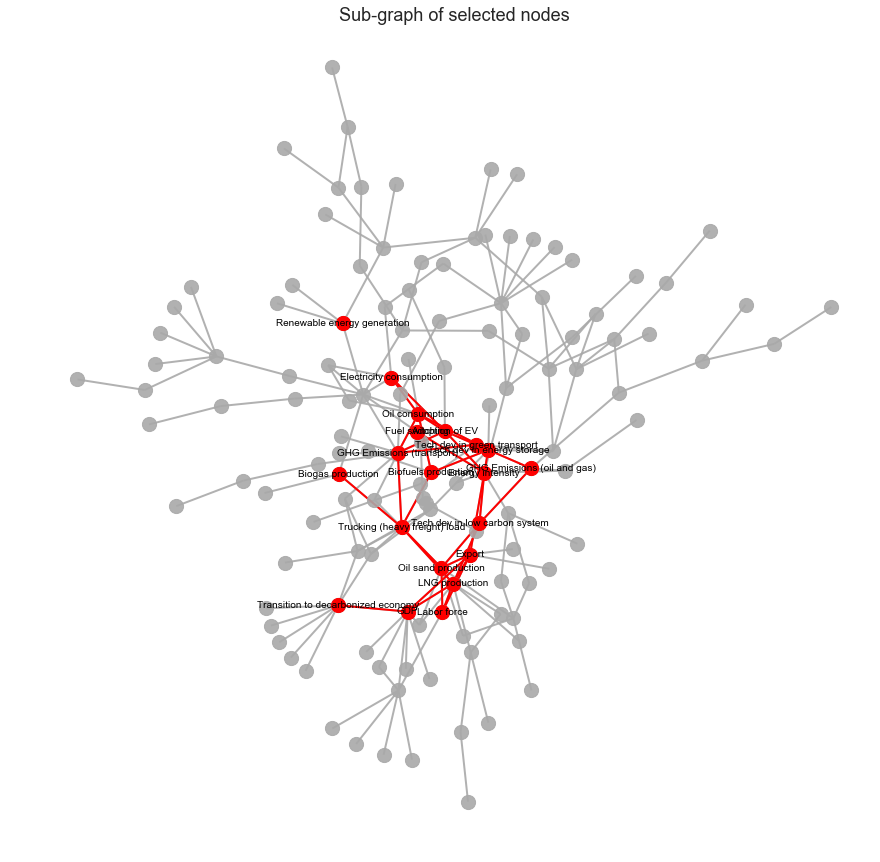

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(15,15))
layout = nx.kamada_kawai_layout(GSE5)
set_style('white')

plt.subplot(111)
plt.axis('off')
plt.title('Sub-graph of selected nodes',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgrey', node_size=200, alpha = 0.9)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2, alpha = 0.9)
nx.draw_networkx_nodes(H, layout, node_color='r', node_size=200, edgecolors='r', alpha=1)
nx.draw_networkx_edges(H, layout, edge_color='r',width=2)
nx.draw_networkx_labels(H, layout, font_size=10, font_color='k')

plt.show()
plt.savefig('./figures/subgraph_selectednodes.pdf')

## Section 4: Communities detections

## Louvain method
Below is the code for detecting community using Louvain method

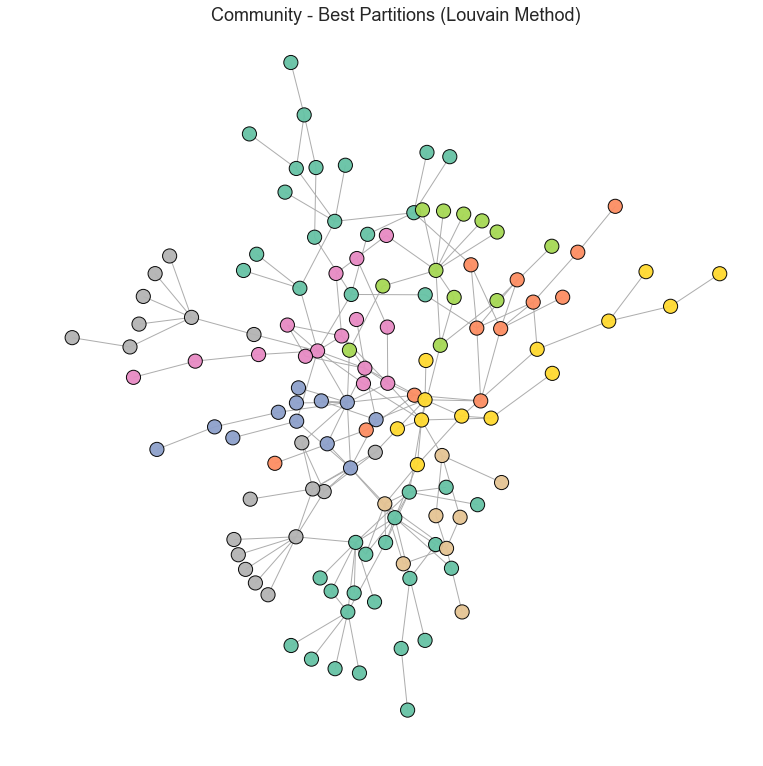

In [35]:
#partition = community.best_partition(giant4)
#This code is not needed because is has been executed earlier

colors = [partition[n] for n in giant4.nodes()]
my_colors = plt.cm.Set2 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html

layout = nx.kamada_kawai_layout(GSE5)
plt.figure(figsize=(10,10))
nx.draw(giant4, layout, edge_color = "darkgrey", node_color=colors, cmap = my_colors, with_labels = False, node_size = 200, edgecolors='k', alpha = .95)

plt.title('Community - Best Partitions (Louvain Method)',fontsize=18)
plt.savefig('./figures/giant4.pdf')

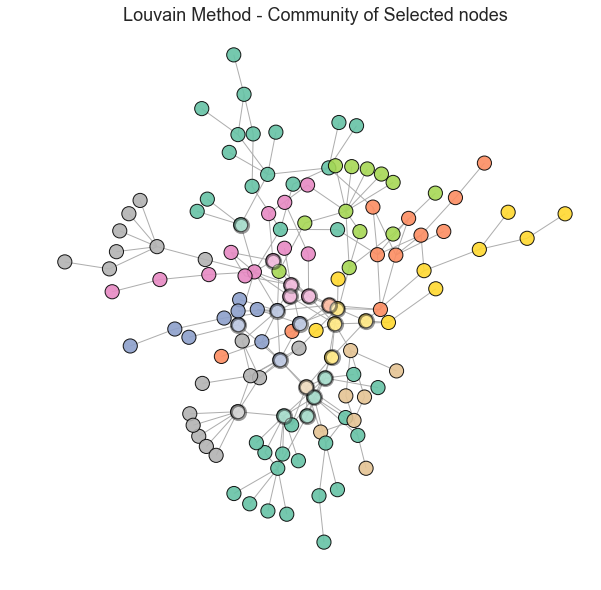

<Figure size 432x288 with 0 Axes>

In [36]:
colors = [partition[n] for n in giant4.nodes()]
my_colors = plt.cm.Set2 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html

layout = nx.kamada_kawai_layout(GSE5)
plt.figure(figsize=(10,10))

plt.axis('off')
plt.title('Louvain Method - Community of Selected nodes',fontsize=18)
#nx.draw_networkx_nodes(H, layout, node_size = 200, edgecolors='k',linewidths=5 ,alpha = .7)
nx.draw_networkx_nodes(giant4, layout, node_color=colors, cmap = my_colors, node_size = 200, edgecolors='k', alpha = .9)
nx.draw_networkx_edges(giant4, layout, edge_color = "darkgrey", alpha = .95)
nx.draw_networkx_nodes(giant4, layout, nodelist=select21_ls, node_color='white', node_size = 200, edgecolors='k', linewidths=3, alpha = .4)

plt.show()
plt.savefig('./figures/community_selectednodes.pdf')

## Group list
The community group list is already created under cent_df dataframe. I sort by community to better viewing

In [39]:
comm_sorted = cent_df.sort_values('Community',ascending=True)
comm_sorted.head(10)

,Eigenvector,Betweenness,Community
New clean tech generation,0.013437,0.016157,0
Road infrastructure,0.000644,0.000000,0
Employment for indigenous communities,0.011712,0.000000,0
Resilience of indigenous communities,0.011712,0.000000,0
Electrification policy,0.001588,0.000000,0
Renewable energy generation,0.060074,0.116281,0
Electricity generation,0.008144,0.048181,0
GHG Emissions (electricity),0.060779,0.089288,0
Geographic availability,0.001588,0.000000,0
Harmonize elect generation load profile,0.000235,0.000000,0


Show the group and the membership of the groups

In [42]:
cent_df.loc[cent_df['Community'] == 0]

,Eigenvector,Betweenness,Community
Electricity generation,0.008144,0.048181,0
Electrification policy,0.001588,0.000000,0
Employment for indigenous communities,0.011712,0.000000,0
Environmental impacts,0.003302,0.032797,0
GHG Emissions (electricity),0.060779,0.089288,0
Geographic availability,0.001588,0.000000,0
Harmonize elect generation load profile,0.000235,0.000000,0
Hydro electric generation,0.012365,0.027569,0
Inter-province HV infrastructure,0.001205,0.016915,0
Inter-province electricity trade,0.002646,0.014053,0


In [43]:
cent_df.loc[cent_df['Community'] == 1]

,Eigenvector,Betweenness,Community
Developing countries GDP,0.037826,0.000000,1
Economic productivity,0.015695,0.000000,1
Educational attainment,0.015695,0.000000,1
Export,0.194013,0.121547,1
GDP,0.167261,0.120529,1
Gas-fired generation,0.002393,0.000000,1
Income per capita,0.048306,0.000000,1
Innovation capacity,0.080501,0.061558,1
LNG demand,0.012274,0.015385,1
LNG demand (USA),0.011808,0.000000,1


In [44]:
cent_df.loc[cent_df['Community'] == 2]

,Eigenvector,Betweenness,Community
Community-owned energy system,0.012495,0.046927,2
Emerging green transport businesses,0.027587,0.015385,2
Energy production cost,0.010071,0.026607,2
Enterprenuership in private sector,0.000494,0.000000,2
Innovation capacity (global),0.070385,0.078319,2
Large-scale hydropower construction,0.008483,0.000254,2
Regulatory standard for green transport,0.005378,0.000000,2
Solar power generation,0.004008,0.000000,2
Solar power production cost,0.020556,0.044518,2
Tech dev in green transport,0.136129,0.051149,2


In [45]:
cent_df.loc[cent_df['Community'] == 3]

,Eigenvector,Betweenness,Community
Biofuels consumption (Freight),0.070158,0.000000,3
Biofuels production,0.167117,0.014047,3
Biogas production,0.109867,0.065078,3
Blending target policy mandate,0.102738,0.000413,3
Electrification of light freight transport,0.070158,0.000000,3
Electrification of rail transport,0.073043,0.030531,3
Freight (trade) volume,0.123283,0.000000,3
GHG Emissions (transport),0.359865,0.240562,3
Intercity (people) mobility,0.014803,0.015385,3
Rail infrastrcuture,0.002886,0.000000,3


In [46]:
cent_df.loc[cent_df['Community'] == 4]

,Eigenvector,Betweenness,Community
Adoption of EV,0.240423,0.069164,4
Biofuels consumption,0.078911,0.000549,4
Electricity consumption,0.185863,0.036040,4
Electricity consumption (residential),0.038548,0.017024,4
Energy intensity (transport),0.048723,0.015385,4
Energy studies scholarship,0.002162,0.000000,4
Fuel switching,0.091960,0.074770,4
GHG Emissions (aggregate),0.269634,0.362730,4
Health issues for indigenous communities,0.058599,0.000000,4
Indigenous knowledge,0.011091,0.015385,4


In [47]:
cent_df.loc[cent_df['Community'] == 5]

,Eigenvector,Betweenness,Community
Active mobility,0.048340,0.109238,5
Banning coal/oil-fired generation,0.001910,0.000000,5
Carbon intensity,0.009797,0.015385,5
Distance travel,0.018741,0.020011,5
Energy consumption,0.022319,0.087841,5
House size,0.004351,0.000000,5
Number of passenger per vehicle,0.004351,0.000000,5
Number of people per household,0.004351,0.000000,5
Road speed limit,0.004351,0.000000,5
Shared mobility,0.073811,0.029850,5


In [48]:
cent_df.loc[cent_df['Community'] == 6]

,Eigenvector,Betweenness,Community
Carbon sink,0.000151,0.000000,6
District cooling/heating,0.000744,0.000000,6
Energy intensity,0.202061,0.274979,6
GHG Emissions (agriculture),0.010996,0.000000,6
GHG Emissions (building),0.003814,0.045677,6
GHG Emissions (oil and gas),0.076253,0.083423,6
GHG reduction target,0.056404,0.022011,6
Innovation capacity,0.035363,0.000000,6
Tech dev in articifical intelligence,0.039394,0.000000,6
Tech dev in energy storage,0.181387,0.136290,6


In [49]:
cent_df.loc[cent_df['Community'] == 7]

,Eigenvector,Betweenness,Community
Building retrofit incentives,0.009596,0.000000,7
Energy efficiency policy mandate,0.049220,0.038862,7
Energy tech change (building),0.020403,0.001870,7
Energy tech change (transport),0.020403,0.001870,7
LNG production (USA),0.010807,0.000000,7
Oil demand (global),0.047009,0.000000,7
Oil prices (global),0.055430,0.025105,7
Oil sand production,0.185688,0.073844,7


In [50]:
cent_df.loc[cent_df['Community'] == 8]

,Eigenvector,Betweenness,Community
Agricultural production,0.113139,0.045903,8
Biorefinery strategy,0.078639,0.023756,8
Biotech production,0.018267,0.000000,8
Feedstock (biofuel) supply,0.113434,0.021243,8
Fishery production,0.018267,0.000000,8
Food prices,0.022057,0.000000,8
Forest production,0.108838,0.030518,8
High-tech manufacturing production,0.018267,0.000000,8
Sustainable social change,0.018267,0.000000,8
Transition to decarbonized economy,0.093694,0.082379,8


In [51]:
cent_df.loc[cent_df['Community'] == 9]

,Eigenvector,Betweenness,Community
Clean energy for indigenous community,0.002593,0.000000,9
Gov budget for energy transition,0.002696,0.015385,9
Institutions framework,0.002593,0.000000,9
Low carbon energy governance,0.013301,0.090400,9
Monitoring process,0.002593,0.000000,9
Multilevel governance,0.002593,0.000000,9
Sectoral coordination,0.055159,0.102683,9
Tech dev in green transport (rail),0.000525,0.000000,9
